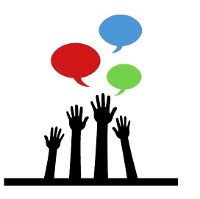
<h1><center>THE SPARKS FOUNDATION</center></h1>  
<h2><center><font color='cyan'>Graduate Rotational Internship Program</font></center></h2>

***

<h3><center>Data Science and Business Analytics Internship</center></h3>
<h3><center><font color='coral'>By:- Dhiraj Naganath Patil</font></center></h3>

<h2><center>Exploratory Data Analysis-Terrorism</center></h2>
<h3><center>(Level-Intermediate)</center></h3>

<h3><center><font color='blue'>Task4:- EDA on Global Terrorism Data</font></center></h3>

**Import all necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

**Load Dataset**

In [2]:
df=pd.read_csv("C:\\Users\\DHIRAJ PATIL\\Desktop\\Python\\Datasets\\globalterrorism.csv",
               header=0,encoding='latin-1',low_memory=False)

In [3]:
df.head()

,eventid,year,month,day,approxdate,extended,resolution,country,country.1,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
print('Rows,Columns=',df.shape)

Rows,Columns= (181691, 135)


**There are many columns which have more than 80% missing values, As we enough data size, So I have removed that features**

In [5]:
pct_null_values=df.isnull().sum()*100/len(df)
df_pct_null_values=pd.DataFrame({'cols':df.columns,'PercentageOfMissingValues':pct_null_values})
df_pct_null_values

,cols,PercentageOfMissingValues
eventid,eventid,0.000000
year,year,0.000000
month,month,0.000000
day,day,0.000000
approxdate,approxdate,94.914993
...,...,...
INT_LOG,INT_LOG,0.000000
INT_IDEO,INT_IDEO,0.000000
INT_MISC,INT_MISC,0.000000
INT_ANY,INT_ANY,0.000000


In [6]:
features_to_remove=df_pct_null_values[df_pct_null_values['PercentageOfMissingValues']>80]
features_to_remove

,cols,PercentageOfMissingValues
approxdate,approxdate,94.914993
resolution,resolution,98.778145
alternative,alternative,84.032781
alternative_txt,alternative_txt,84.032781
attacktype2,attacktype2,96.524869
...,...,...
hostkidoutcome,hostkidoutcome,93.950719
hostkidoutcome_txt,hostkidoutcome_txt,93.950719
released,released,94.275996
addnotes,addnotes,84.430159


In [7]:
new_df=df.drop(features_to_remove.index,axis=1)

In [8]:
new_df.shape

(181691, 67)

In [9]:
new_df.head()

,eventid,year,month,day,extended,country,country.1,region,region_txt,provstate,...,ishostkid,ransom,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1.970000e+11,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,0.0,0.0,NaN,NaN,NaN,PGIS,0,0,0,0
1,1.970000e+11,1970,0,0,0,130,Mexico,1,North America,Federal,...,1.0,1.0,NaN,NaN,NaN,PGIS,0,1,1,1
2,1.970010e+11,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,0.0,0.0,NaN,NaN,NaN,PGIS,-9,-9,1,1
3,1.970010e+11,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,0.0,0.0,NaN,NaN,NaN,PGIS,-9,-9,1,1
4,1.970010e+11,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,0.0,0.0,NaN,NaN,NaN,PGIS,-9,-9,1,1


In [10]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 67 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  float64
 1   year              181691 non-null  int64  
 2   month             181691 non-null  int64  
 3   day               181691 non-null  int64  
 4   extended          181691 non-null  int64  
 5   country           181691 non-null  int64  
 6   country.1         181691 non-null  object 
 7   region            181691 non-null  int64  
 8   region_txt        181691 non-null  object 
 9   provstate         181270 non-null  object 
 10  city              181257 non-null  object 
 11  latitude          177135 non-null  float64
 12  longitude         177134 non-null  float64
 13  specificity       181685 non-null  float64
 14  vicinity          181691 non-null  int64  
 15  location          55495 non-null   object 
 16  summary           11

In [11]:
new_df.describe()

,eventid,year,month,day,extended,country,region,latitude,longitude,specificity,...,nwoundte,property,propextent,propvalue,ishostkid,ransom,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,77381.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002704e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,-0.145811,-4.543731,-4.464398,0.090010,-3.945952
std,1.325955e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,1.488881,3.122889,0.486912,1.552463e+07,0.461244,1.207861,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991020e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000,0.000000,3.000000,-9.900000e+01,0.000000,0.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009020e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,0.000000,1.000000,3.000000,-9.900000e+01,0.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014080e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,0.000000,1.000000,4.000000,1.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.017120e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,200.000000,1.000000,4.000000,2.700000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Most ATTACKED REGIONS**<br>=> Middle East & North Africa,South Asia,South America 

In [22]:
new_df['region_txt'].value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region_txt, dtype: int64

**NUMBER OF TERRORIST ATTACKS PER YEAR**<br>=> More attacks happened in the year 2014 followed by year 2015 and 2016

In [16]:
AttacksPerYear=new_df.groupby('year').size().sort_values(ascending=False)
AttacksPerYear.head(10)

year
2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
dtype: int64

**MOST ATTACKED COUNTRIES**<br>=> Iraq,Pakistan,Afganistan had major terrorist attacks, India is at 4 th rank

In [12]:
prop=new_df.groupby('country.1')

In [13]:
prop.size().sort_values(ascending=False).head(10)

country.1
Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
dtype: int64

**MOST ATTACKED CITIES**<br>=> Most of the cities are from ARAB countries

In [20]:
MostAttackedCities=new_df.groupby('city').size().sort_values(ascending=False)
MostAttackedCities.head(20)

city
Unknown           9775
Baghdad           7589
Karachi           2652
Lima              2359
Mosul             2265
Belfast           2171
Santiago          1621
Mogadishu         1581
San Salvador      1558
Istanbul          1048
Athens            1019
Bogota             984
Kirkuk             925
Beirut             918
Medellin           848
Benghazi           840
Peshawar           819
Quetta             803
Guatemala City     755
Baqubah            745
dtype: int64

**MOST TARGETED PLACES**<br>=> The target of attack is oftenly public and crowdy area to make more casualties

In [14]:
mostTargetedPlaces=new_df.groupby('targtype1_txt')

In [15]:
mostTargetedPlaces.size().sort_values(ascending=False)

targtype1_txt
Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
dtype: int64

**MOST USED WEAPONS**<br> => Explosives,Firearms

In [17]:
new_df.groupby('weaptype1_txt').size().sort_values(ascending=False)

weaptype1_txt
Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                       